In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from PIL import Image
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [4]:
import os
print(os.listdir("/content/drive/My Drive/ewt latest dataset"))

['Untitled0.ipynb', '.ipynb_checkpoints', 'test', 'train']


In [5]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a third convolutional layer
classifier.add(Conv2D(128, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a fourth convolutional layer
classifier.add(Conv2D(128, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 64, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [6]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/My Drive/ewt latest dataset/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/drive/My Drive/ewt latest dataset/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 455 images belonging to 2 classes.
Found 64 images belonging to 2 classes.


In [7]:
filepath = "best_model.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history = classifier.fit_generator(training_set,
                         steps_per_epoch = 14,
                         epochs = 30,
                         validation_data = test_set,
                         validation_steps = 2,
                         callbacks = [checkpoint])
print(history.history.keys())

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
14/14 [==============================] - 6s 411ms/step - loss: 0.7010 - accuracy: 0.5130 - val_loss: 0.6978 - val_accuracy: 0.5000
Epoch 2/30
14/14 [==============================] - 5s 376ms/step - loss: 0.6891 - accuracy: 0.5579 - val_loss: 0.7017 - val_accuracy: 0.5000
Epoch 3/30
14/14 [==============================] - 5s 374ms/step - loss: 0.6847 - accuracy: 0.5603 - val_loss: 0.6947 - val_accuracy: 0.5000
Epoch 4/30
14/14 [==============================] - 5s 374ms/step - loss: 0.6744 - accuracy: 0.5674 - val_loss: 0.6730 - val_accuracy: 0.5312
Epoch 5/30
14/14 [==============================] - 5s 382ms/step - loss: 0.6306 - accuracy: 0.6384 - val_loss: 0.5918 - val_accuracy: 0.6875
Epoch 6/30
14/14 [==============================] - 5s 370ms/step - loss: 0.5913 - accuracy: 0.7045 - val_loss: 0.5684 - val_accuracy: 0.7188
Epoch 7/30
14/14 [==============================] - 5s 369ms/step - loss

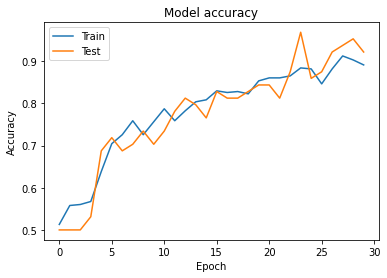

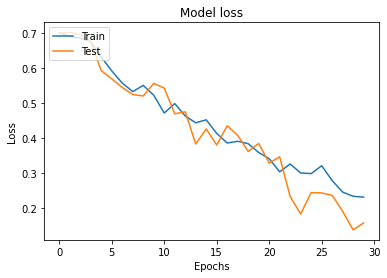

In [9]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()